In [1]:
import matplotlib.pyplot as plt
import numpy as np

# plt.rcParams.update({'font.size': 12})
# model_predictor/LSTM_reduced_input_high_learning_rate_weighted_average_50_epochs.txt
#     reduced input; 1e-3; loss is weighted average

# model_predictor/LSTM_50_epochs.txt
#     reduced input; 1e-4; loss is sum

# model_predictor/additive_F_1e-04_0_train.txt
#     full input; 1e-4; loss is sum


In [34]:
f = open("model_predictor/LSTM_50_epochs.txt", "r")
# for x in f:
#     print(x)

In [ ]:
# RQN_1000_1e-4_training.txt
#   only 5 reward for catching

# RQN_more_reward_10000_1e-4_train.txt
#   add reward for approaching bonded by environment size

# RQN_bonded_4000_1e-4_training.txt
#   approaching reward bonded by min((max((min_dist_x - dist5_x)/min_dist_x, 0) + max((min_dist_y - dist5_y)/min_dist_y, 0)),2)

# RQN_20_2000_1e-4_training.txt
#   increase reward for catching to 20

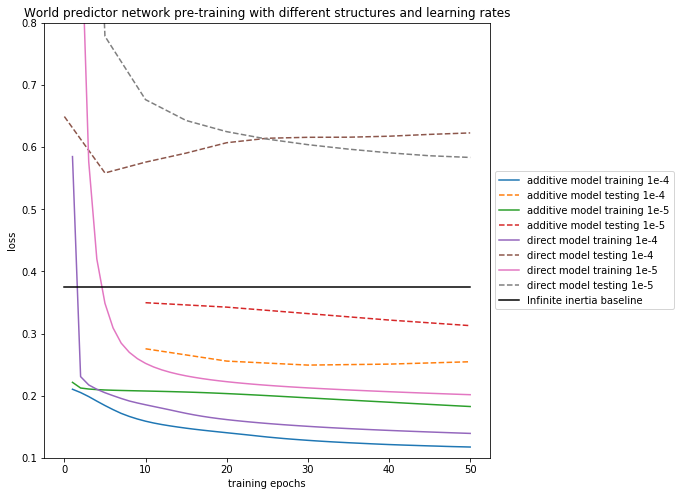

In [8]:
direct_train4 = []
direct_test4 = []
with open("model_predictor/exp_log/pretraining_direct_prediction_1e-4.txt", "r") as f:
    for line in f:
        if line[0] == 'W':
            direct_train4.append(float(line[22:]))
        if line[0:2] == 'Te':
            direct_test4.append(float(line[11:]))
        

direct_train5 = []
direct_test5 = []
with open("model_predictor/exp_log/pretraining_direct_prediction_1e-5.txt", "r") as f:
    for line in f:
        if line[0] == 'W':
            direct_train5.append(float(line[22:]))
        if line[0:2] == 'Te':
            direct_test5.append(float(line[11:]))

train4 = []
with open("model_predictor/additive_F_1e-04_1_train.txt", "r") as f:
    for line in f:
        if line[0] == 'W':
            train4.append(float(line[22:]))

        
test4 = []
with open("model_predictor/additive_F_1e-04_1_test.txt", "r") as f:
    for line in f:
            if line[0] == ' ':
                test4.append(float(line[23:41]))


train5 = []
with open("model_predictor/additive_F_1e-05_1_train.txt", "r") as f:
    for line in f:
        if line[0] == 'W':
            train5.append(float(line[22:]))

        
test5 = []
with open("model_predictor/additive_F_1e-05_1_test.txt", "r") as f:
    for line in f:
            if line[0] == ' ':
                test5.append(float(line[23:38]))

# x_1 = np.arange(0, len(direct_train))
                
    
x1 = np.arange(0, len(train4))
x1+=1
x2 = np.arange(0, len(test4))
x2 += 1
x2 *= 10
# x3 = np.arange(0, len(train5))
# x4 = np.arange(0, len(test5))
# x4 += 1
# x4 *= 10

x3 = np.arange(0, len(direct_test4))

x3 *= 5


baseline = np.ones(11)
baseline *= 0.3746
x_base = np.arange(0, len(baseline))
x_base *= 5

worstline = np.ones(10)
worstline *= 8.7051
x_worst = np.arange(0, len(baseline))
x_worst *= 5


# plt.savefig('loss_reward_model_predictor_training.png', bbox_inches='tight')
# plt.show()


fig = plt.figure()
fig.set_size_inches(10, 8)
ax = plt.subplot(111)
ax.set_ylim([0.1,0.8])
ax.plot(x1, train4, label='additive model training 1e-4')
ax.plot(x2, test4, label='additive model testing 1e-4', linestyle='--')
ax.plot(x1, train5, label='additive model training 1e-5')
ax.plot(x2, test5, label='additive model testing 1e-5', linestyle='--')

ax.plot(x1, direct_train4, label='direct model training 1e-4')
ax.plot(x3, direct_test4, label='direct model testing 1e-4', linestyle='--')
ax.plot(x1, direct_train5, label='direct model training 1e-5')
ax.plot(x3, direct_test5, label='direct model testing 1e-5', linestyle='--')

ax.plot(x_base, baseline, label='Infinite inertia baseline',color='black')

plt.xlabel('training epochs')
plt.ylabel('loss')

plt.title("World predictor network pre-training with different structures and learning rates")

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])


# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('world_predictor_pre_training.pdf', bbox_inches='tight')
# f.savefig("foo.pdf", bbox_inches='tight')
plt.show()

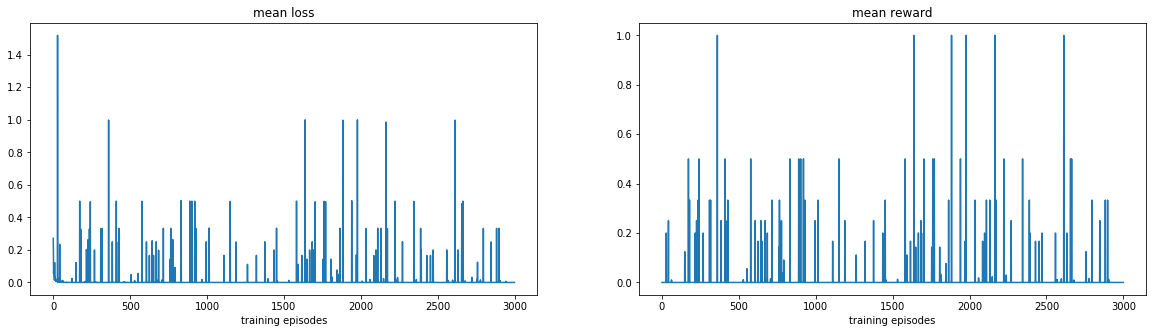

In [16]:
reward_1 = []
loss_1 = []

f = open("RQN_1000_1e-4_training.txt", "r")
for line in f:
    if line[0] == '[' and len(line) > 70:
        index = line.find('mean reward')
        index += 14
        reward_1.append(float(line[index:index+6]))
        
        index = line.find('mean loss')
        index += 12
        loss_1.append(float(line[index:index+6]))

        
f = open("RQN_1000-1100_1e-4_training.txt", "r")
for line in f:
    if line[0] == '[' and len(line) > 70:
        index = line.find('mean reward')
        index += 14
        reward_1.append(float(line[index:index+6]))
        
        index = line.find('mean loss')
        index += 12
        loss_1.append(float(line[index:index+6]))

f = open("RQN_1100-3000_1e-4_training.txt", "r")
for line in f:
    if line[0] == '[' and len(line) > 70:
        index = line.find('mean reward')
        index += 14
        reward_1.append(float(line[index:index+6]))
        
        index = line.find('mean loss')
        index += 12
        loss_1.append(float(line[index:index+6]))

reward_1 = np.array(reward_1)
loss_1 = np.array(loss_1)

x = np.arange(0, len(reward_1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax1.plot(x, loss_1)
ax2.plot(x, reward_1)

# plt.plot(x, loss_1, label='mean loss')
# plt.plot(x, reward_1, label='mean reward')


ax1.set_xlabel('training episodes')
# ax1.set_ylabel('mean loss')
ax1.set_title('mean loss')
           
ax2.set_xlabel('training episodes')
ax2.set_title('mean reward')

# fig.legend()

fig.show()

# Only reward 1 for successful catching

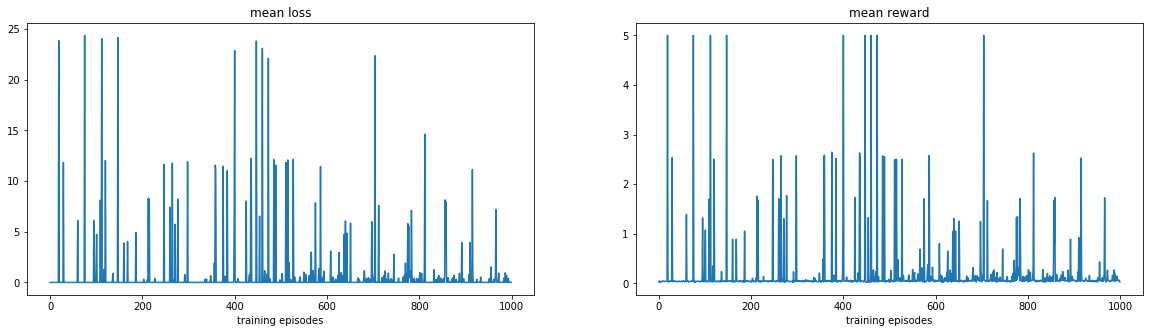

In [22]:
reward_2 = []
loss_2 = []

f = open("RQN_more_reward_10000_1e-4_train.txt", "r")
i = 0
for line in f:
#     if i == 3000:
#         break
    
    if line[0] == '[' and len(line) > 70:
        i+=1
        if i%10 == 0:
            index = line.find('mean reward')
            index += 14
            reward_2.append(float(line[index:index+6]))

            index = line.find('mean loss')
            index += 12
            loss_2.append(float(line[index:index+6]))
        
x = np.arange(0, len(reward_2))

fig2, (ax2_1, ax2_2) = plt.subplots(1, 2, figsize=(20, 5))

ax2_1.plot(x, loss_2)
ax2_2.plot(x, reward_2)

# plt.plot(x, loss_1, label='mean loss')
# plt.plot(x, reward_1, label='mean reward')


ax2_1.set_xlabel('training episodes')
# ax1.set_ylabel('mean loss')
ax2_1.set_title('mean loss')
           
ax2_2.set_xlabel('training episodes')
ax2_2.set_title('mean reward')

# fig.legend()

fig.show()
# Reward 5 for successful catching, and reward for approaching closest object (bounded by environment size)

C:\Users\Mingxuan\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


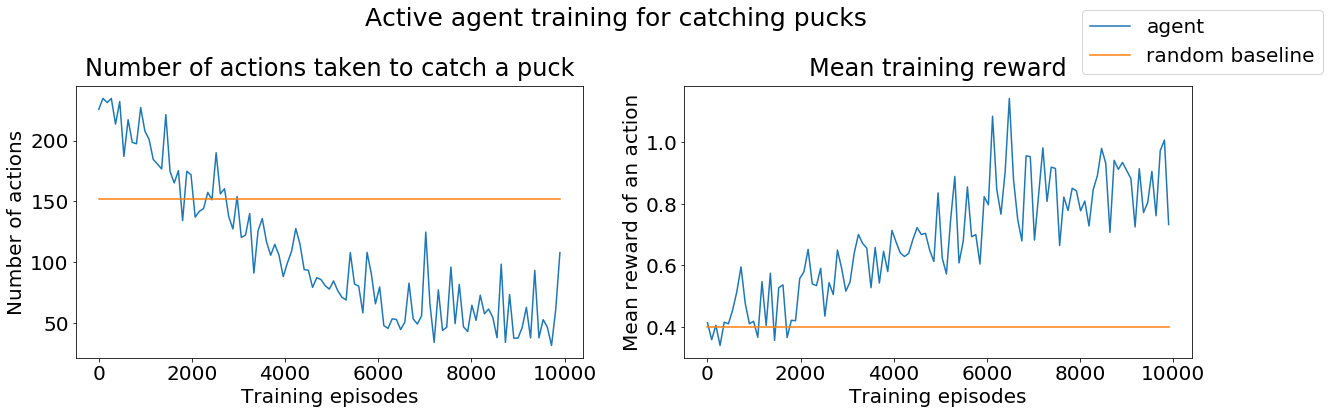

In [2]:
plt.rcParams.update({'font.size': 20, 'axes.titlepad': 10})
reward_3 = []
loss_3 = []

f = open("exp_log/new_catch_training.txt", "r")
i = 0

plot_gap = 90

mean_steps=[]
mean_reward=[]

for line in f:
    
    if line[0] == '[' and len(line) > 70:
        i+=1
        index = line.find('mean reward')
        index += 14
        reward = float(line[index:index+6])
        mean_reward.append(float(line[index:index+6]))
        index = line.find('total reward')
        index += 15
        mean_steps.append(float(line[index:index+6])/reward)
            
        if i%plot_gap == 0:
            reward_3.append(np.mean(mean_reward))
            loss_3.append(np.mean(mean_steps))
            mean_steps = []
            mean_reward = []
            
f = open("exp_log/new_catch_testing_random.txt", "r")
random_rewards = []
for line in f:
    if line[0] == '[':
        index = line.find('mean reward')
        index += 14
        reward = float(line[index:index+6])
        random_rewards.append(reward)

x = np.arange(0, len(reward_3))
x*=plot_gap

random_steps = np.ones(len(reward_3))
random_steps *= 151.88
random_reward = np.ones(len(reward_3))
random_reward *= np.mean(random_rewards)


fig3, (ax3_1, ax3_2) = plt.subplots(1, 2, figsize=(20, 5))
# fig3, ax3_2 = plt.subplots(1, 1, figsize=(10, 5))
ax3_1.plot(x, loss_3, label = 'agent')
ax3_1.plot(x, random_steps, label = 'random baseline')

ax3_2.plot(x, reward_3)
ax3_2.plot(x, random_reward)

# plt.plot(x, loss_1, label='mean loss')
# plt.plot(x, reward_1, label='mean reward')


ax3_1.set_xlabel('Training episodes')
ax3_1.set_ylabel('Number of actions')
ax3_1.set_title('Number of actions taken to catch a puck')
           
ax3_2.set_xlabel('Training episodes')
ax3_2.set_ylabel('Mean reward of an action')
ax3_2.set_title('Mean training reward')
fig3.suptitle('Active agent training for catching pucks', fontsize=25, y=1.1)
# plt.set_title('active agent pre-training for catching pucks')
fig3.legend()
fig3.savefig('agent_pre_training.pdf', bbox_inches='tight')
fig3.show()


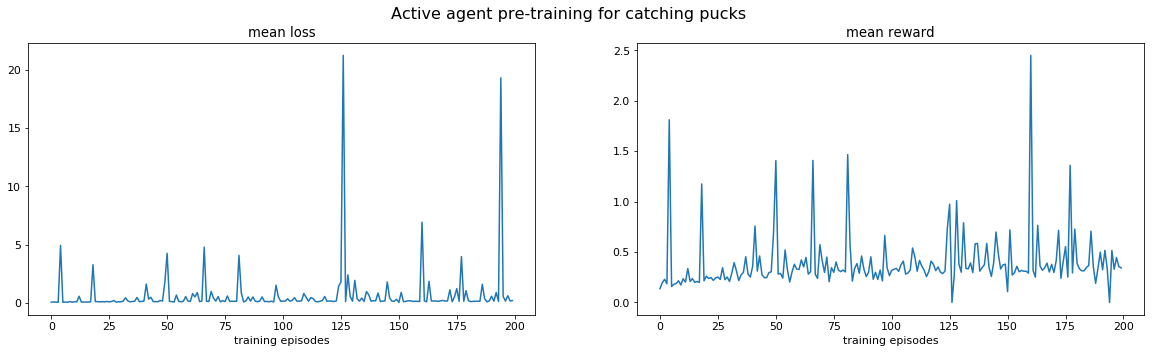

In [38]:
# Reward 5 for successful catching, and reward for approaching closest object (bounded by initial frame)

reward_3 = []
loss_3 = []

f = open("RQN_bonded_4000_1e-4_training.txt", "r")
i = 0
for line in f:
#     if i == 3000:
#         break
    
    if line[0] == '[' and len(line) > 70:
        i+=1
        if i%10 == 0:
            index = line.find('mean reward')
            index += 14
            reward = float(line[index:index+6])
            if reward < 5:
                reward_3.append(float(line[index:index+6]))
            else:
                reward_3.append(0)

            index = line.find('mean loss')
            index += 12
            loss_3.append(float(line[index:index+6]))
        
x = np.arange(0, len(reward_3))


fig3, (ax3_1, ax3_2) = plt.subplots(1, 2, figsize=(20, 5))

ax3_1.plot(x, loss_3)
ax3_2.plot(x, reward_3)

# plt.plot(x, loss_1, label='mean loss')
# plt.plot(x, reward_1, label='mean reward')


ax3_1.set_xlabel('training episodes')
# ax1.set_ylabel('mean loss')
ax3_1.set_title('mean loss')
           
ax3_2.set_xlabel('training episodes')
ax3_2.set_title('mean reward')
fig3.suptitle('Active agent pre-training for catching pucks', fontsize=16)
# plt.set_title('active agent pre-training for catching pucks')
# fig.legend()
fig3.savefig('agent_pre_training.pdf', bbox_inches='tight')
fig3.show()

# Reward 5 for successful catching, and reward for approaching closest object (bounded by initial frame)

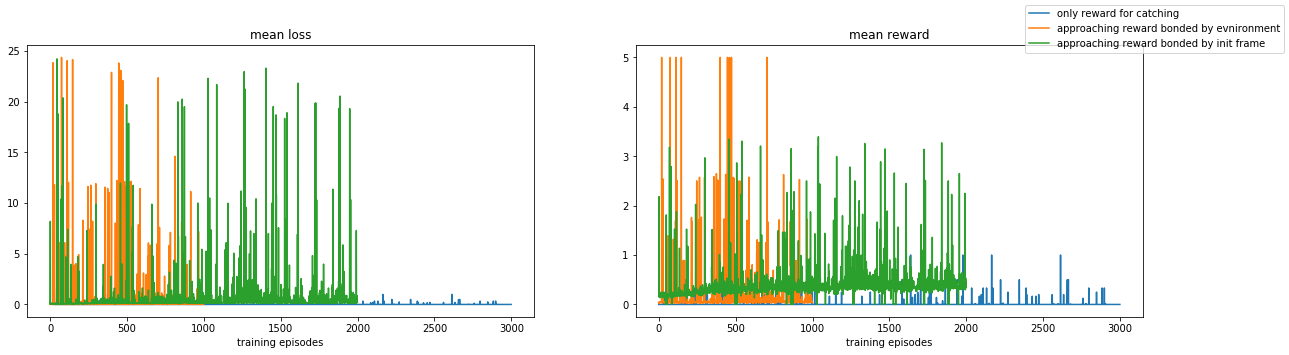

In [35]:
x1 = np.arange(0, len(reward_1))
x2 = np.arange(0, len(reward_2))
x3 = np.arange(0, len(reward_3))

fig_, (ax_l, ax_r) = plt.subplots(1, 2, figsize=(20, 5))

ax_l.plot(x1, loss_1, label = 'only reward for catching')
ax_l.plot(x2, loss_2, label = 'approaching reward bonded by evnironment')
ax_l.plot(x3, loss_3, label = 'approaching reward bonded by init frame')

# ax_r.plot(x1, reward_1, label = '1')
# ax_r.plot(x2, reward_2, label = '2')
# ax_r.plot(x3, reward_3, label = '3')
ax_r.plot(x1, reward_1)
ax_r.plot(x2, reward_2)
ax_r.plot(x3, reward_3)

ax_l.set_xlabel('training episodes')
ax_l.set_title('mean loss')

ax_r.set_xlabel('training episodes')
ax_r.set_title('mean reward')

fig_.legend()
fig_.show()

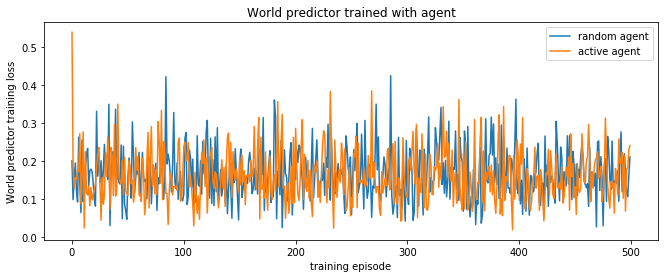

Mean training loss of model predictor
trained with random agent: 0.16648003171332038
trained with active agent: 0.1615633743164277


In [32]:
# loss drop reward
# random agent

f = open("exp_log/concurrent_training_random_agent.txt", "r")
random_learning_loss = []
for line in f:
    if line[0] == 'm':
        loss = float(line[6:])
        random_learning_loss.append(loss)
        
f = open("exp_log/concurrent_training_active_agent.txt", "r")
active_learning_loss = []
for line in f:
    if line[0] == 'p':
        loss = float(line[16:])
        active_learning_loss.append(loss)
        
random_x = np.arange(0, len(random_learning_loss))
active_x = np.arange(0, len(active_learning_loss))

fig = plt.figure()
fig.set_size_inches(11, 4)
plt.plot(random_x, random_learning_loss, label='random agent')
plt.plot(active_x, active_learning_loss, label='active agent')

plt.xlabel('training episode')
plt.ylabel('World predictor training loss')

plt.title("World predictor trained with agent")

plt.legend()
plt.savefig('loss_drop_training.pdf', bbox_inches='tight')
plt.show()
print('Mean training loss of model predictor')
print('trained with random agent: {}'.format(np.mean(random_learning_loss)))
print('trained with active agent: {}'.format(np.mean(active_learning_loss)))

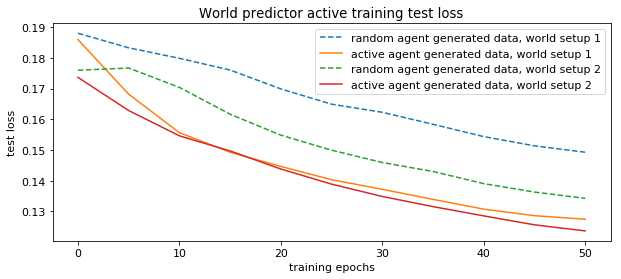

Mean test loss of model predictor
trained on data from random agent: 0.1670601040648325, 0.1534549777497867
trained on data from active agent: 0.14563131260424889, 0.1425210559715451


In [5]:
# loss reward
# random agent
# Train agent first, use trained agent to generate 500 training set, train model predict for 50 epochs, test at each 5 epochs
plt.rcParams.update({'font.size': 11})
f = open("exp_log/active_training_1.txt", "r")
new_active_2 = []
for line in f:
    if line[0] == 'T':
        loss = float(line[11:])
        new_active_2.append(loss)

f = open("model_predictor/exp_log/loss_reward_random_traning.txt", "r")
random_loss_reward_test_loss = []
for line in f:
    if line[0] == 'T':
        loss = float(line[11:])
        random_loss_reward_test_loss.append(loss)
        
f = open("model_predictor/exp_log/loss_reward_active_traning.txt", "r")
active_loss_reward_test_loss = []
for line in f:
    if line[0] == 'T':
        loss = float(line[11:])
        active_loss_reward_test_loss.append(loss)
        
        
# f = open("model_predictor/active_traning_world-1.txt", "r")
# active_2 = []
# for line in f:
#     if line[0] == 'T':
#         loss = float(line[11:])
#         active_2.append(loss)
        
f = open("model_predictor/exp_log/random_traning_world-1.txt", "r")
random_2 = []
for line in f:
    if line[0] == 'T':
        loss = float(line[11:])
        random_2.append(loss)
        
random_x = np.arange(0, len(random_loss_reward_test_loss))
random_x *= 5


fig = plt.figure()
fig.set_size_inches(10, 4)
plt.plot(random_x, random_loss_reward_test_loss, label='random agent generated data, world setup 1', linestyle='--')
plt.plot(random_x, active_loss_reward_test_loss, label='active agent generated data, world setup 1')

plt.plot(random_x, random_2, label='random agent generated data, world setup 2', linestyle='--')
# plt.plot(random_x, active_2, label='active agent generated data, world setup 2')

plt.plot(random_x, new_active_2, label='active agent generated data, world setup 2')

plt.xlabel('training epochs')
plt.ylabel('test loss')

plt.title("World predictor active training test loss")

plt.legend()
plt.savefig('loss_reward_model_predictor_training.pdf', bbox_inches='tight')
plt.show()
print('Mean test loss of model predictor')
print('trained on data from random agent: {}, {}'.format(np.mean(random_loss_reward_test_loss), np.mean(random_2)))
print('trained on data from active agent: {}, {}'.format(np.mean(active_loss_reward_test_loss), np.mean(new_active_2)))